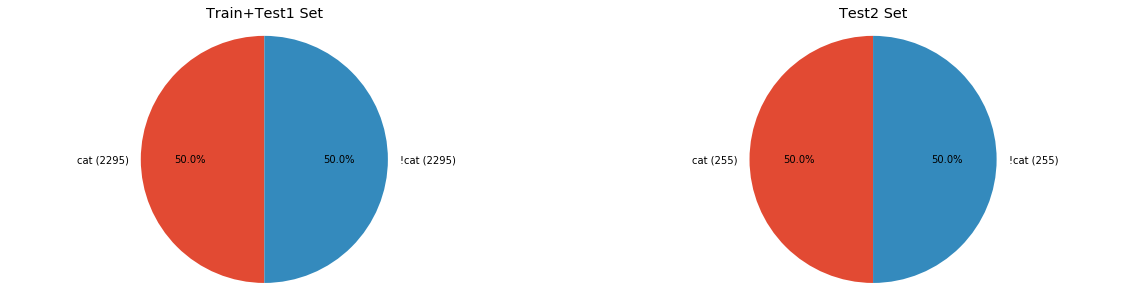

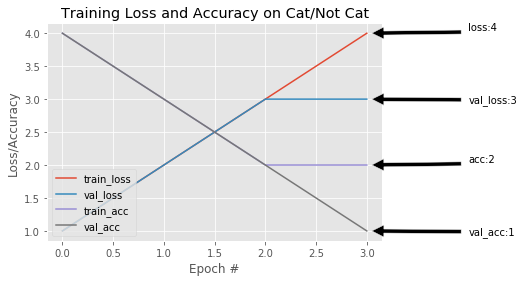

Confusion matrix, without normalization
[[0 1]
 [1 0]]


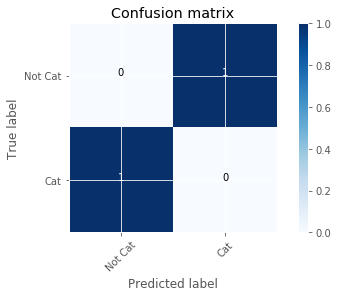

In [2]:
%matplotlib inline

# test de la fonction
from sklearn.metrics import confusion_matrix
from imgpred import gvutils
import matplotlib.pyplot as plt
from importlib import reload
reload(gvutils)

gvutils.imgs_stats("images")

N = 4
class H:
    history = {
        "loss": [1,2,3,4],
        "val_loss": [1,2,3,3],
        "acc": [4,3,2,2],
        "val_acc": [4,3,2,1]
    }
gvutils.print_save_plot(N, H, "reporting/plot_XX.png")

imgs = {
    "tp": [("tmp_img/cat/google00000.jpg","Cat: 95.2")],
    "tn": [("tmp_img/not_cat/ukbench00000.jpg","Cat: 9.2")],
    "fp": [("tmp_img/not_cat/ukbench00001.jpg","Cat: 65.2")],
    "fn": [("tmp_img/cat/google00001.jpg","Cat: 5.2")]
}
gvutils.save_confusion_matrix_samples(imgs, "reporting/conf_trial.png")
plt.show()
gvutils.plot_confusion_matrix(confusion_matrix([0,1], [1,0]), classes=["Not Cat", "Cat"])
plt.show()

In [3]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load dataset
print("[INFO] loading dataset...")
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
print("[INFO] done")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
print("[INFO] ready to fit")
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Using TensorFlow backend.


[INFO] loading dataset...
[INFO] done
[INFO] ready to fit
Best: 0.687500 using {'batch_size': 80, 'epochs': 100}
0.433594 (0.143773) with: {'batch_size': 10, 'epochs': 10}
0.563802 (0.117722) with: {'batch_size': 10, 'epochs': 50}
0.682292 (0.019225) with: {'batch_size': 10, 'epochs': 100}
0.466146 (0.137566) with: {'batch_size': 20, 'epochs': 10}
0.661458 (0.012890) with: {'batch_size': 20, 'epochs': 50}
0.669271 (0.027126) with: {'batch_size': 20, 'epochs': 100}
0.601563 (0.064502) with: {'batch_size': 40, 'epochs': 10}
0.667969 (0.044993) with: {'batch_size': 40, 'epochs': 50}
0.636719 (0.020915) with: {'batch_size': 40, 'epochs': 100}
0.613281 (0.045999) with: {'batch_size': 60, 'epochs': 10}
0.643229 (0.031304) with: {'batch_size': 60, 'epochs': 50}
0.666667 (0.053970) with: {'batch_size': 60, 'epochs': 100}
0.555990 (0.019488) with: {'batch_size': 80, 'epochs': 10}
0.671875 (0.043146) with: {'batch_size': 80, 'epochs': 50}
0.687500 (0.022097) with: {'batch_size': 80, 'epochs': 10